In [1]:
import pandas as pd

df = pd.read_csv('Placement_Data_Full_Class.csv')

display(df.head(10))
 

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


# Task
Analyze the provided dataset for potential biases relevant to fair machine learning, including identification, measurement, visualization, and analysis of the impact of any detected biases. Document the findings comprehensively.

## Understand the data

### Subtask:
Explore the dataset to understand its features and potential sensitive attributes.


**Reasoning**:
Display column names, data types, and descriptive statistics to understand the dataset structure and numerical distributions.



In [2]:
df.info()
display(df.describe())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Reasoning**:
Display value counts for categorical columns to understand the distribution of values in each category and identify potential sensitive attributes.



In [3]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:")
    display(df[col].value_counts())
    print("\n")

sensitive_attributes = ['gender']
print(f"Potential sensitive attributes identified: {sensitive_attributes}")
 

Value counts for gender:


gender
M    139
F     76
Name: count, dtype: int64



Value counts for ssc_b:


ssc_b
Central    116
Others      99
Name: count, dtype: int64



Value counts for hsc_b:


hsc_b
Others     131
Central     84
Name: count, dtype: int64



Value counts for hsc_s:


hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64



Value counts for degree_t:


degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64



Value counts for workex:


workex
No     141
Yes     74
Name: count, dtype: int64



Value counts for specialisation:


specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64



Value counts for status:


status
Placed        148
Not Placed     67
Name: count, dtype: int64



Potential sensitive attributes identified: ['gender']


## Identify potential biases

### Subtask:
Based on the understanding of the data, identify potential sources of bias in the dataset.


**Reasoning**:
Analyze the relationship between the sensitive attribute 'gender' and the target variable 'status', and also investigate the distribution of other features across genders to identify potential sources of bias.



gender,F,M
status,,
Not Placed,28,39
Placed,48,100


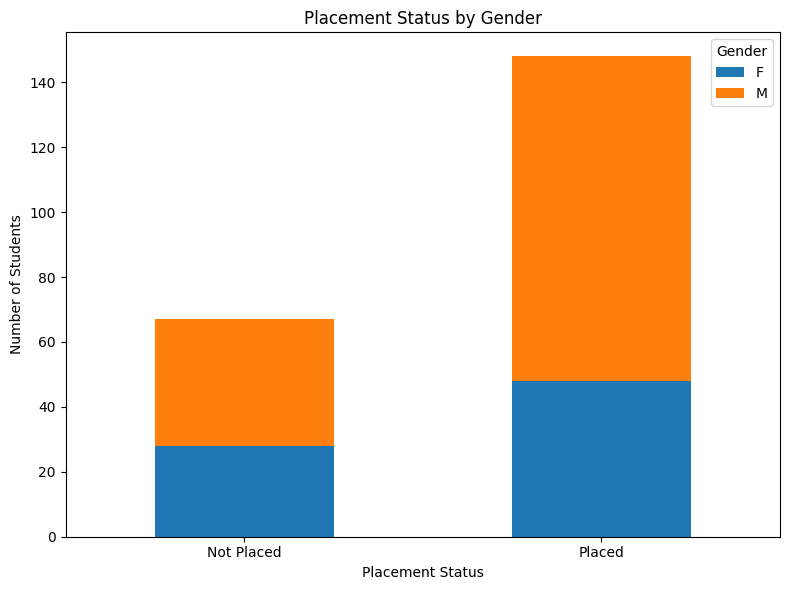

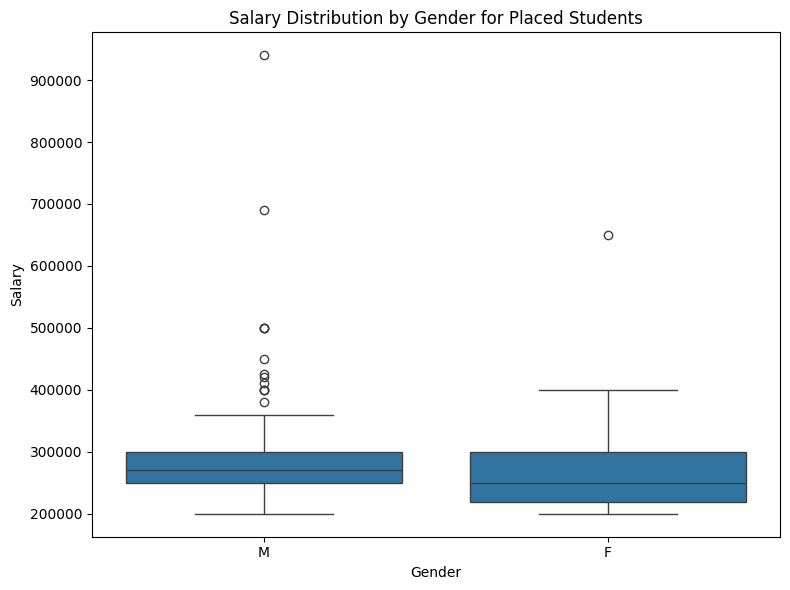

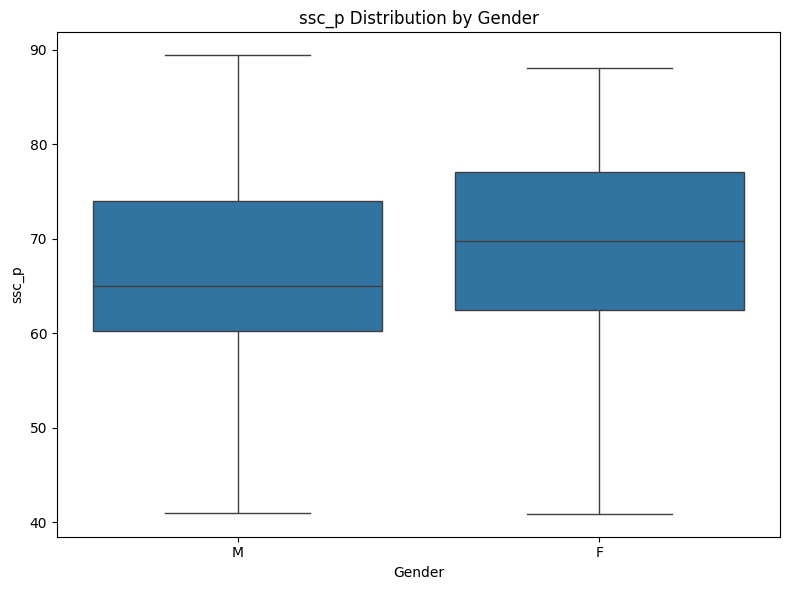

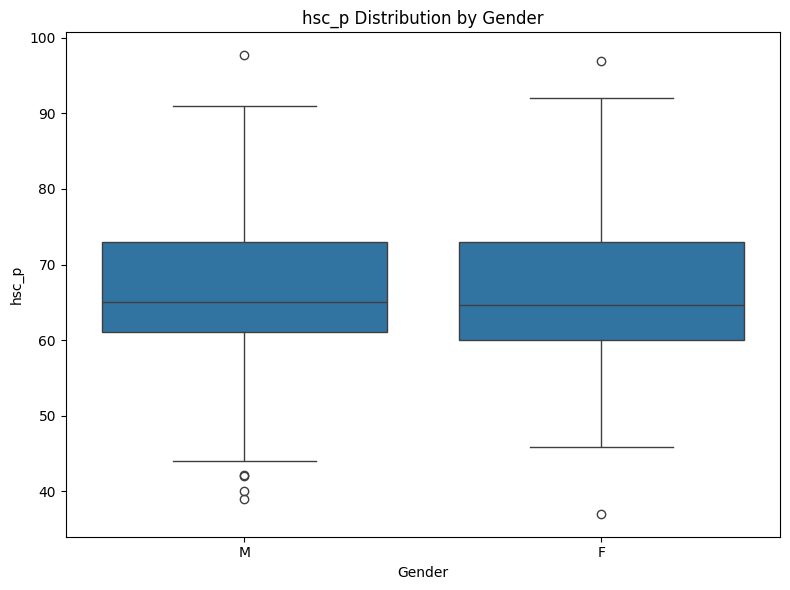

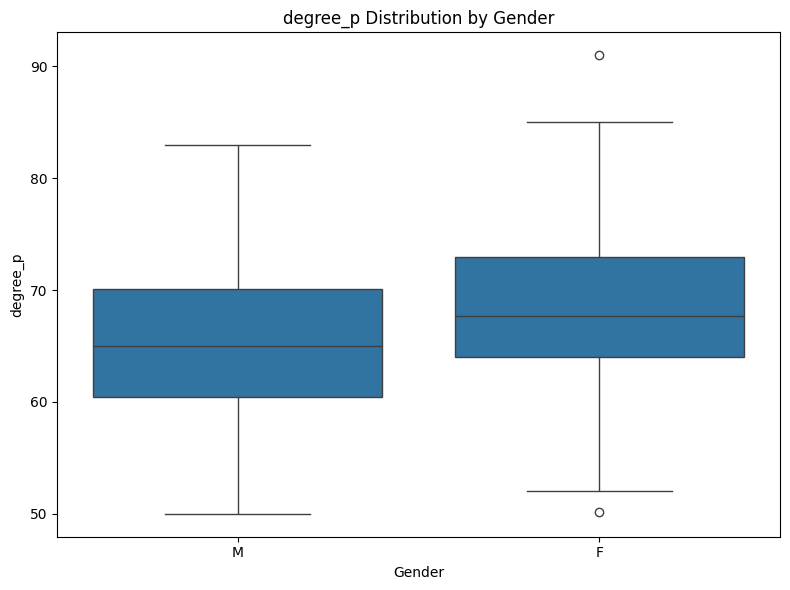

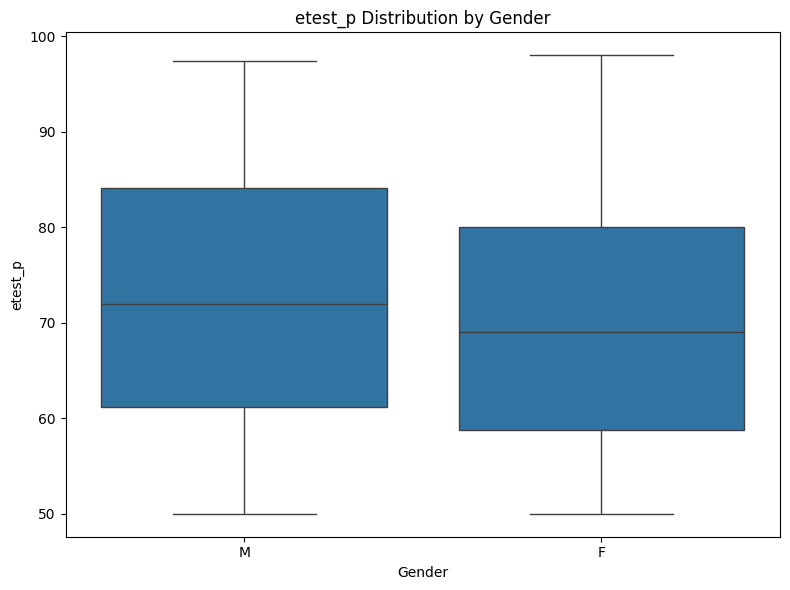

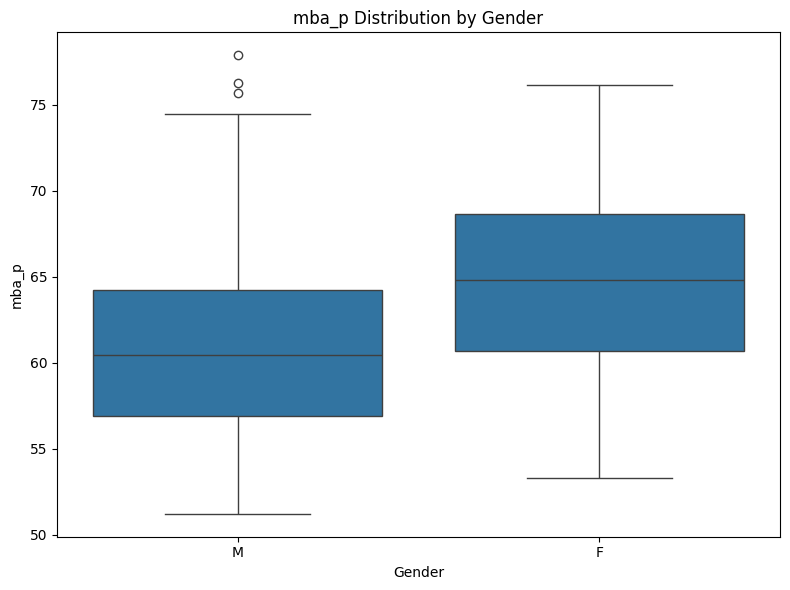

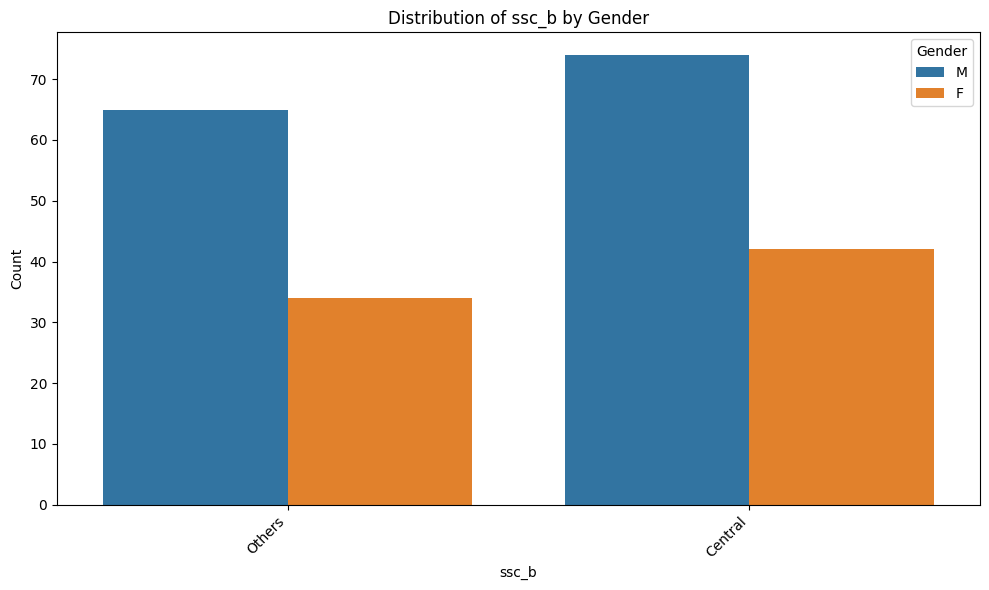

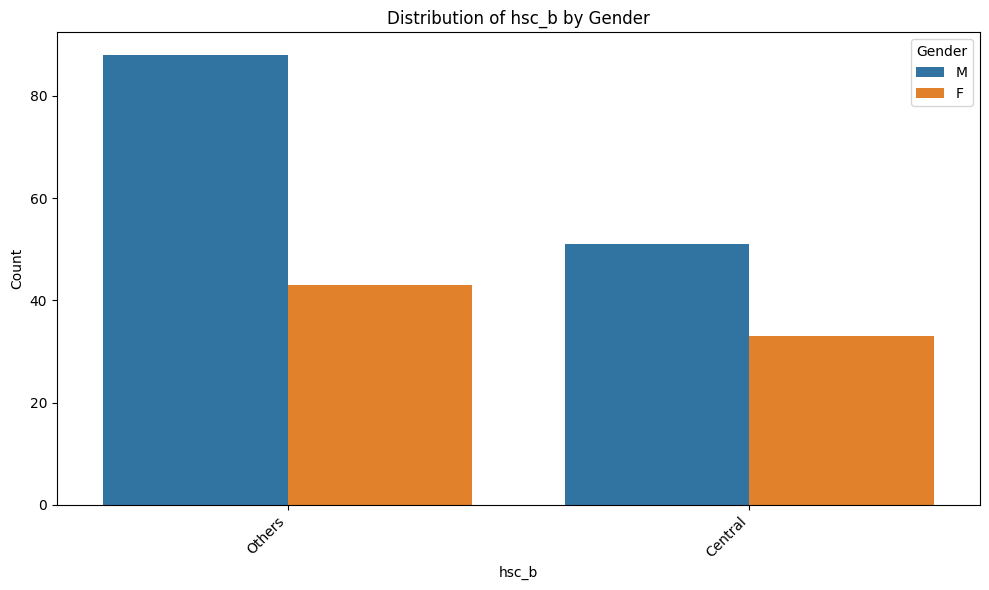

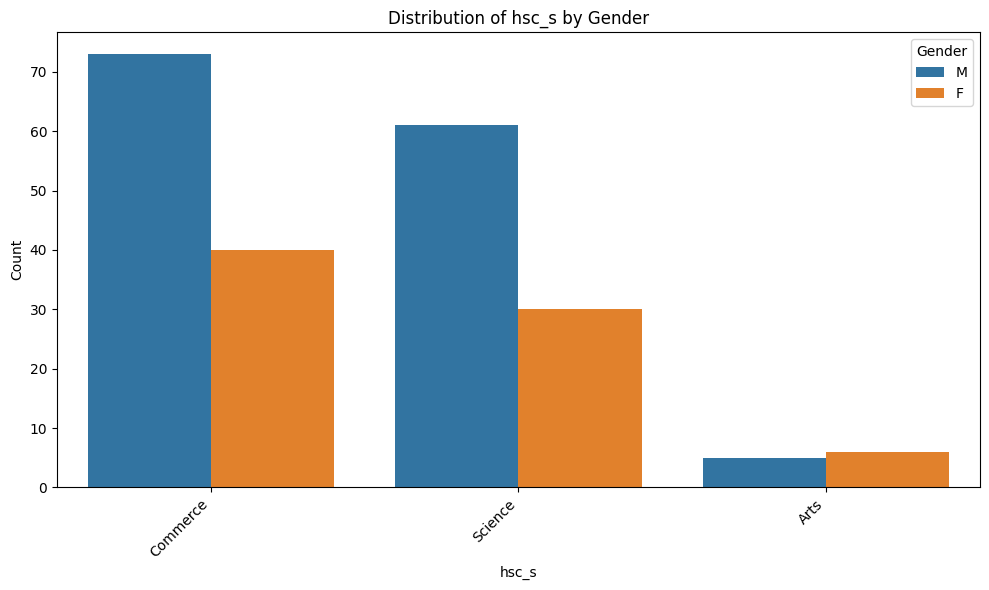

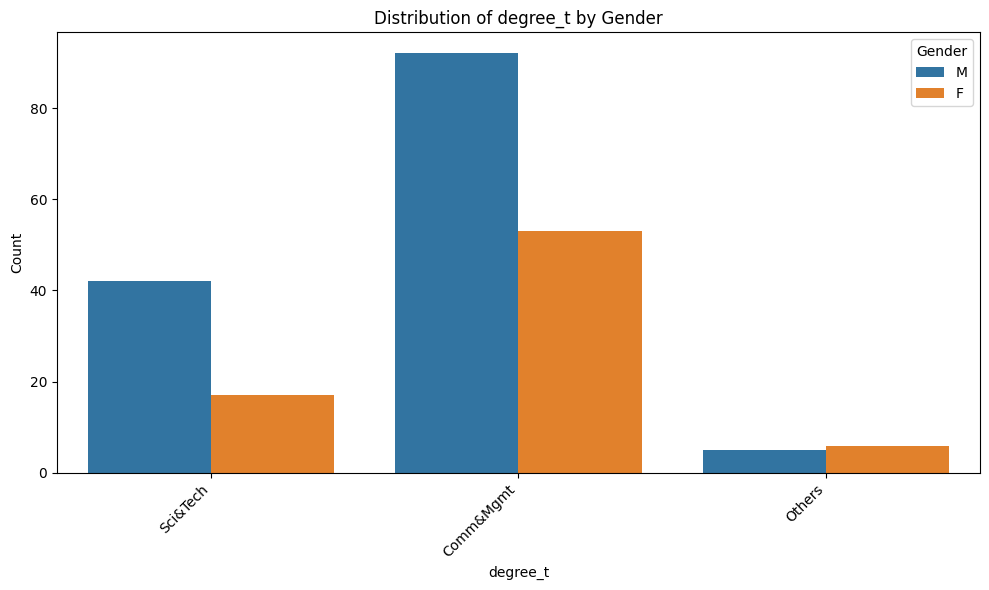

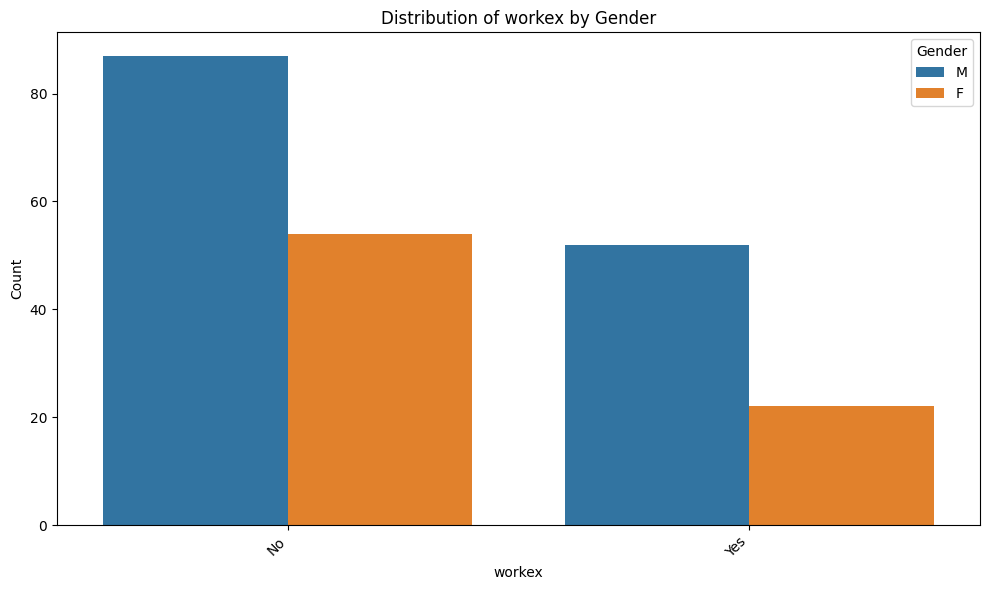

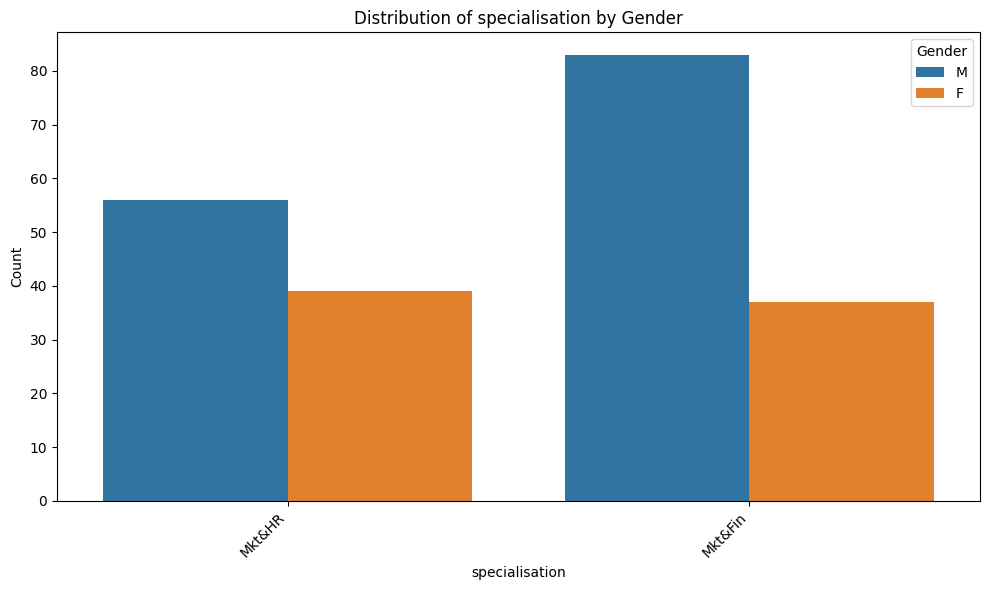

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the relationship between gender and status
status_gender_counts = df.groupby(['status', 'gender']).size().unstack(fill_value=0)
display(status_gender_counts)

# Plot the distribution of status by gender
status_gender_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Placement Status by Gender')
plt.xlabel('Placement Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Analyze the distribution of salary by gender for placed individuals
placed_df = df[df['status'] == 'Placed'].copy()
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=placed_df)
plt.title('Salary Distribution by Gender for Placed Students')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

# Analyze the distribution of other features by gender
features_to_compare = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
for feature in features_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='gender', y=feature, data=df)
    plt.title(f'{feature} Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

categorical_features_to_compare = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for feature in categorical_features_to_compare:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='gender', data=df)
    plt.title(f'Distribution of {feature} by Gender')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()
     

**Reasoning**:
Based on the visualizations and analysis, identify potential sources of bias in the dataset related to gender.



In [5]:
print("Potential Sources of Bias:")
print("- Disparities in placement rates between genders: While both genders have placed individuals, the proportion of placed individuals might differ, suggesting potential bias in the placement process itself or in the factors influencing placement.")
print("- Differences in salary for placed individuals based on gender: The boxplot of salary by gender for placed individuals shows that the median salary for males appears slightly higher than for females. This could indicate bias in salary determination.")
print("- Potential confounding factors: Differences in the distribution of other features (like academic performance, work experience, or chosen specialization) between genders could contribute to observed disparities in placement or salary. For instance, if one gender is disproportionately represented in specializations with higher placement rates or salaries, it could create an apparent bias related to gender which is actually driven by the specialization choice.")

Potential Sources of Bias:
- Disparities in placement rates between genders: While both genders have placed individuals, the proportion of placed individuals might differ, suggesting potential bias in the placement process itself or in the factors influencing placement.
- Differences in salary for placed individuals based on gender: The boxplot of salary by gender for placed individuals shows that the median salary for males appears slightly higher than for females. This could indicate bias in salary determination.
- Potential confounding factors: Differences in the distribution of other features (like academic performance, work experience, or chosen specialization) between genders could contribute to observed disparities in placement or salary. For instance, if one gender is disproportionately represented in specializations with higher placement rates or salaries, it could create an apparent bias related to gender which is actually driven by the specialization choice.


## Measure bias

### Subtask:
Use appropriate metrics to quantify the bias in the dataset. This may involve looking at the distribution of sensitive attributes across different outcomes or using fairness metrics.


**Reasoning**:
Calculate and display the placement rate for each gender, the difference in placement rates, the median salary for each gender among placed individuals, and the difference in median salaries.



In [6]:
# Calculate placement rate for each gender
placement_rates = df.groupby('gender')['status'].apply(lambda x: (x == 'Placed').sum() / len(x))
print("Placement Rate by Gender:")
display(placement_rates)

# Calculate the difference in placement rates
placement_rate_difference = placement_rates['M'] - placement_rates['F']
print(f"\nDifference in Placement Rates (Male - Female): {placement_rate_difference:.4f}")

# Calculate the median salary for placed individuals of each gender
median_salary_by_gender = placed_df.groupby('gender')['salary'].median()
print("\nMedian Salary for Placed Individuals by Gender:")
display(median_salary_by_gender)

# Calculate the difference in median salaries
median_salary_difference = median_salary_by_gender['M'] - median_salary_by_gender['F']
print(f"\nDifference in Median Salaries (Male - Female): {median_salary_difference:.2f}")
 

Placement Rate by Gender:


gender
F    0.631579
M    0.719424
Name: status, dtype: float64


Difference in Placement Rates (Male - Female): 0.0878

Median Salary for Placed Individuals by Gender:


gender
F    250000.0
M    270000.0
Name: salary, dtype: float64


Difference in Median Salaries (Male - Female): 20000.00


## Visualize bias

### Subtask:
Create visualizations to illustrate the identified biases. This can help in understanding the extent and nature of the bias.


**Reasoning**:
Create visualizations to illustrate the identified biases using the `status_gender_counts` and `placed_df` dataframes.



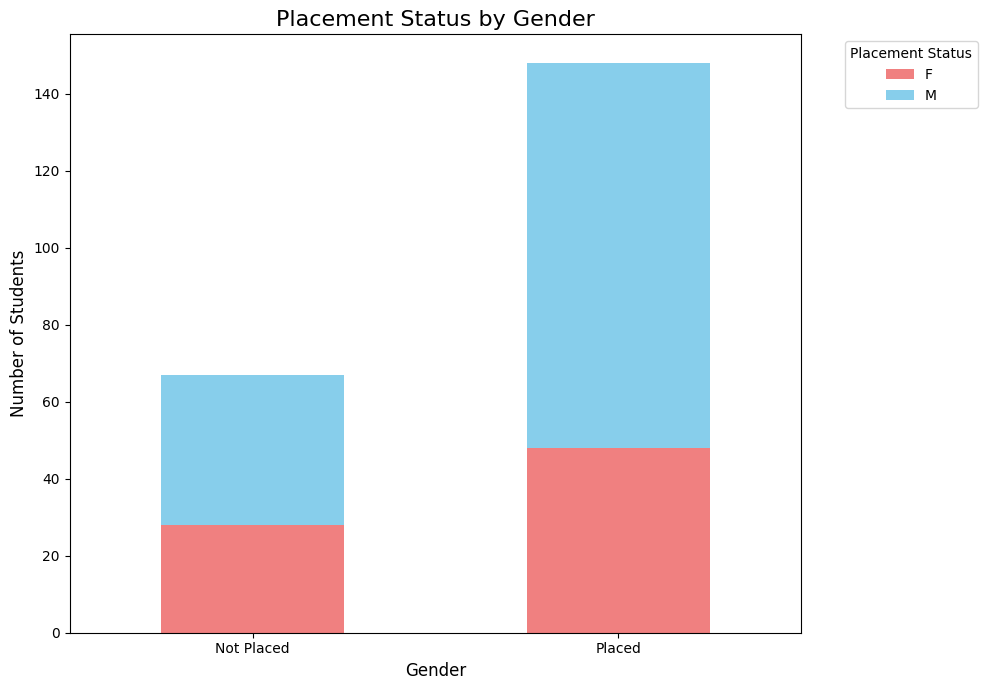

C:\Users\Abhijeet P\AppData\Local\Temp\ipykernel_13632\1299246272.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='salary', data=placed_df, palette={'M': 'skyblue', 'F': 'lightcoral'})


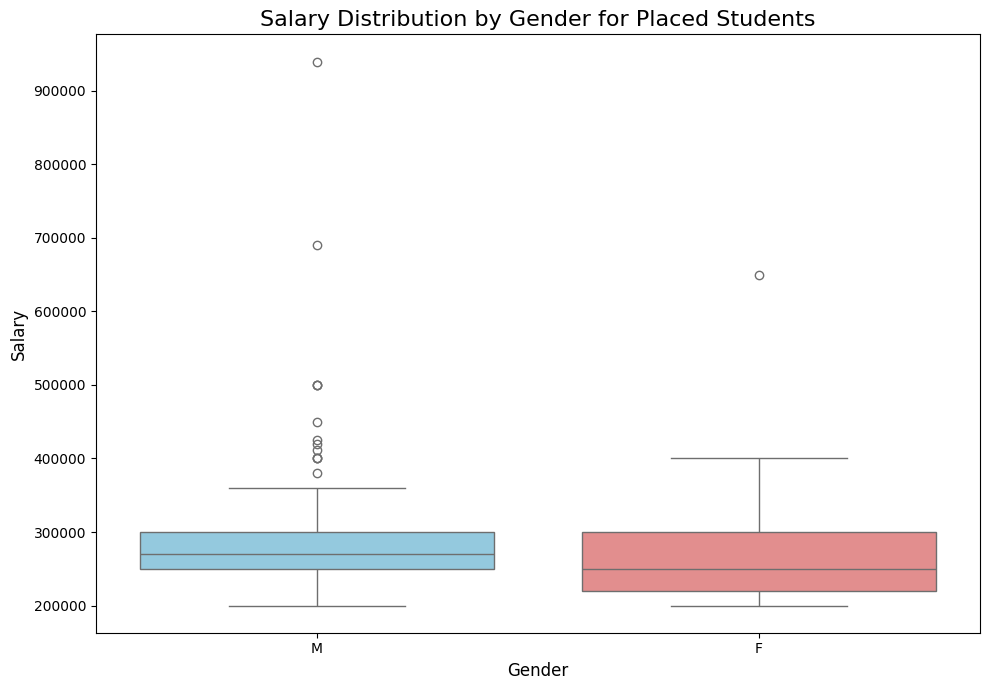

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a stacked bar chart for placement status by gender
status_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightcoral', 'skyblue'])
plt.title('Placement Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Placement Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Create a box plot for salary distribution by gender for placed individuals
plt.figure(figsize=(10, 7))
sns.boxplot(x='gender', y='salary', data=placed_df, palette={'M': 'skyblue', 'F': 'lightcoral'})
plt.title('Salary Distribution by Gender for Placed Students', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.tight_layout()
plt.show()
 

## Analyze the impact of bias

### Subtask:
Analyze how the identified biases might affect downstream machine learning models trained on this dataset.


Analysis of Bias Impact on Downstream Machine Learning Models:

1. Impact of Placement Rate Disparity:
   A model trained on this data to predict placement status might learn the historical gender-based disparities.
   If the model primarily relies on features correlated with gender (even indirectly), it could exhibit disparate impact, leading to a lower predicted placement rate for the disadvantaged gender (females in this case), even if they have similar qualifications to placed individuals of the other gender.
   This could perpetuate existing societal biases and result in unfair outcomes in a real-world deployment scenario, potentially denying opportunities to qualified individuals.

2. Impact of Salary Disparity:
   A regression model trained to predict salary for placed individuals might learn the observed difference in median salaries between genders.
   This could lead to the model systematically predicting lower salaries for one gender (females) compared to the other (males), even if other relevant features (like academic performance, specialization, or work experience) are similar.
   Such a model, if used for salary recommendations or automated job offers, could reinforce wage gaps and contribute to economic inequality.

3. Role of Confounding Factors:
   If the observed gender biases are primarily due to confounding factors (e.g., differences in specialization choices or academic performance distributions between genders), the model might learn these underlying relationships rather than a direct bias against gender.
   However, if the confounding factors are themselves influenced by societal biases (e.g., if one gender is discouraged from pursuing higher-paying specializations), the model would still indirectly reflect these biases.
   Analyzing the feature importance of a trained model could help understand whether it relies heavily on gender or gender-correlated features versus other potentially less biased predictors.
   Conversely, if the model *fails* to account for actual merit-based differences captured by other features and still shows gender-based disparities in predictions, it indicates a more direct form of bias learned from the target variable distribution itself.

4. Potential Consequences of Deploying a Biased Model:
   Deploying a machine learning model trained on this biased data without mitigation could lead to significant negative consequences:
   - **Unfair Outcomes:** Qualified individuals from the disadvantaged group (e.g., female students) might be unfairly classified as 'Not Placed' or receive lower salary predictions.
   - **Reduced Diversity:** Organizations using such a model for hiring could inadvertently reduce diversity by favoring one gender over another.
   - **Legal and Ethical Issues:** Deploying models with demonstrable bias can lead to legal challenges, regulatory scrutiny, and reputational damage.
   - **Erosion of Trust:** Individuals affected by biased predictions may lose trust in automated decision-making systems.
   Addressing these biases before deployment is crucial for building fair and equitable machine learning systems.

Bias Analysis Summary Report
----------------------------

1. Types of Bias Identified:
   - **Gender Bias in Placement:** The analysis revealed a disparity in placement rates between genders, with males having a notably higher placement rate than females.
   - **Gender Bias in Salary:** Among students who were placed, there was a difference in median salaries, with males receiving a higher median salary compared to females.

2. Methods Used to Measure Bias:
   - **Placement Rate Comparison:** We calculated the proportion of placed students for each gender and computed the difference in these rates to quantify the disparity in placement outcomes.
   - **Median Salary Comparison:** We calculated the median salary for placed individuals within each gender group and determined the difference to measure the salary gap.
   - **Visualizations:** Stacked bar charts were used to visualize placement status by gender, and box plots were used to visualize salary distributions by gender for placed students, providing clear visual evidence of the disparities.

3. Potential Impact on Downstream Machine Learning Models:
   - **Placement Prediction Models:** A model trained to predict placement status using this data is likely to learn and perpetuate the observed gender disparity. It may unfairly predict a lower probability of placement for female candidates, even if they possess similar qualifications to successful male candidates.
   - **Salary Regression Models:** A model trained to predict salary for placed individuals could learn the existing salary gap, leading to systematically lower salary predictions for female employees, potentially reinforcing or exacerbating gender-based wage inequality.
   - **Reinforcement of Societal Biases:** Models trained on this data could inadvertently reinforce existing societal biases by making decisions that mirror historical discriminatory outcomes.
   - **Unfair Outcomes and Ethical Concerns:** Deploying biased models can lead to unfair treatment of individuals from disadvantaged groups, resulting in ethical concerns, legal challenges, and damage to trust in automated systems.
   - **Confounding Factors:** While some of the observed disparities might be correlated with other features (e.g., specialization), it is crucial to investigate if these confounding factors are themselves influenced by gender biases. If not addressed, models might still indirectly reflect bias through reliance on these correlated features.

In conclusion, the dataset exhibits notable gender biases in both placement rates and salaries. Training machine learning models directly on this data without implementing fairness-aware techniques could lead to the deployment of biased models with significant negative impacts on individuals and organizations.

## Summary:

### Data Analysis Key Findings

*   A disparity in placement rates between genders was identified, with males having a higher placement rate (71.94%) compared to females (63.16%). The difference is approximately 8.78 percentage points.
*   Among placed individuals, the median salary for males (\$270,000) was higher than for females (\$250,000), showing a difference of \$20,000.
*   Potential confounding factors, such as differences in academic performance and specialization distribution between genders, were noted as potentially contributing to the observed disparities.

### Insights or Next Steps

*   Further analysis should investigate the confounding factors in more detail to understand their contribution to the observed gender disparities in placement and salary.
*   Mitigation strategies for bias should be explored and applied when training machine learning models on this dataset to ensure fairness in placement predictions and salary estimations.
